In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.listdir()

['.ipynb_checkpoints', 'ncr_ride_bookings.csv', 'UBER Analysis.ipynb']

In [225]:
df = pd.read_csv('ncr_ride_bookings.csv')

In [226]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [227]:
df.columns = df.columns.str.lower()

In [228]:
df.columns

Index(['date', 'time', 'booking id', 'booking status', 'customer id',
       'vehicle type', 'pickup location', 'drop location', 'avg vtat',
       'avg ctat', 'cancelled rides by customer',
       'reason for cancelling by customer', 'cancelled rides by driver',
       'driver cancellation reason', 'incomplete rides',
       'incomplete rides reason', 'booking value', 'ride distance',
       'driver ratings', 'customer rating', 'payment method'],
      dtype='object')

## Dataset Column Description

| Column Name                     | Description                                                                 |
|---------------------------------|-----------------------------------------------------------------------------|
| Date                            | Date of the booking                                                         |
| Time                            | Time of the booking                                                         |
| Booking ID                      | Unique identifier for each ride booking                                     |
| Booking Status                  | Status of booking (Completed, Cancelled by Customer, Cancelled by Driver, etc.) |
| Customer ID                     | Unique identifier for customers                                             |
| Vehicle Type                    | Type of vehicle (Go Mini, Go Sedan, Auto, eBike/Bike, UberXL, Premier Sedan) |
| Pickup Location                 | Starting location of the ride                                               |
| Drop Location                   | Destination location of the ride                                            |
| Avg VTAT                        | Average time for driver to reach pickup location (in minutes)               |
| Avg CTAT                        | Average trip duration from pickup to destination (in minutes)               |
| Cancelled Rides by Customer     | Customer-initiated cancellation flag                                        |
| Reason for cancelling by Customer | Reason for customer cancellation                                          |
| Cancelled Rides by Driver       | Driver-initiated cancellation flag                                          |
| Driver Cancellation Reason      | Reason for driver cancellation                                              |
| Incomplete Rides                | Incomplete ride flag                                                        |
| Incomplete Rides Reason         | Reason for incomplete rides                                                 |
| Booking Value                   | Total fare amount for the ride                                              |
| Ride Distance                   | Distance covered during the ride (in km)                                    |
| Driver Ratings                  | Rating given to driver (1-5 scale)                                          |
| Customer Rating                 | Rating given by customer (1-5 scale)                                        |
| Payment Method                  | Method used for payment (UPI, Cash, Credit Card, Uber Wallet, Debit Card)   |


In [229]:
df.shape

(150000, 21)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   date                               150000 non-null  object 
 1   time                               150000 non-null  object 
 2   booking id                         150000 non-null  object 
 3   booking status                     150000 non-null  object 
 4   customer id                        150000 non-null  object 
 5   vehicle type                       150000 non-null  object 
 6   pickup location                    150000 non-null  object 
 7   drop location                      150000 non-null  object 
 8   avg vtat                           139500 non-null  float64
 9   avg ctat                           102000 non-null  float64
 10  cancelled rides by customer        10500 non-null   float64
 11  reason for cancelling by customer  1050

In [231]:
df.isna().sum()

date                                      0
time                                      0
booking id                                0
booking status                            0
customer id                               0
vehicle type                              0
pickup location                           0
drop location                             0
avg vtat                              10500
avg ctat                              48000
cancelled rides by customer          139500
reason for cancelling by customer    139500
cancelled rides by driver            123000
driver cancellation reason           123000
incomplete rides                     141000
incomplete rides reason              141000
booking value                         48000
ride distance                         48000
driver ratings                        57000
customer rating                       57000
payment method                        48000
dtype: int64

## Data Cleaning

### Filling Null values

In [232]:
df['cancelled rides by customer'] = df['cancelled rides by customer'].fillna(0)
df['cancelled rides by driver'] = df['cancelled rides by driver'].fillna(0)
df['incomplete rides'] = df['incomplete rides'].fillna(0)

In [233]:
df['reason for cancelling by customer'] = df['reason for cancelling by customer'].fillna('Reason Unkown')
df['driver cancellation reason'] = df['driver cancellation reason'].fillna('Reason Unkown')
df['cancelled rides by customer'] = df['cancelled rides by customer'].fillna('Reason Unkown')
df['incomplete rides reason'] = df['incomplete rides reason'].fillna('Reason Unkown')

In [234]:
df['ride distance'] = df['ride distance'].fillna(df['ride distance'].mean())
df['driver ratings'] = df['driver ratings'].fillna(df['driver ratings'].mean())
df['customer rating'] = df['customer rating'].fillna(df['customer rating'].mean())
df['booking value'] = df['booking value'].fillna(df['booking value'].mean())
df['avg vtat'] = df['avg vtat'].fillna(df['avg vtat'].mean())
df['avg ctat'] = df['avg ctat'].fillna(df['avg ctat'].mean())

In [235]:
df['payment method'] = df['payment method'].fillna(df['payment method'].mode()[0])

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   date                               150000 non-null  object 
 1   time                               150000 non-null  object 
 2   booking id                         150000 non-null  object 
 3   booking status                     150000 non-null  object 
 4   customer id                        150000 non-null  object 
 5   vehicle type                       150000 non-null  object 
 6   pickup location                    150000 non-null  object 
 7   drop location                      150000 non-null  object 
 8   avg vtat                           150000 non-null  float64
 9   avg ctat                           150000 non-null  float64
 10  cancelled rides by customer        150000 non-null  float64
 11  reason for cancelling by customer  1500

### Converting data type.

In [15]:
df['date'] = pd.to_datetime(df['date'])

In [16]:
for i in df.select_dtypes(include='object').columns:
    df[i] = df[i].astype('category')

In [17]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

# EXPLORATORY DATA ANALYSIS

#### Adding features

In [20]:
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

In [21]:
def getTimebyZone(Hour):
    if Hour >=6 and Hour <=12:
        return 'Morning'
    elif Hour>12 and Hour<=18:
        return 'Afternoon'
    elif Hour >18 and Hour<=24:
        return 'Evenings'
    elif Hour >=0 and Hour <6:
        return 'LateNights'

In [22]:
df['timeZone'] = df['hour'].apply(getTimebyZone)

## What is the Percentage of Bookings by TimeZone

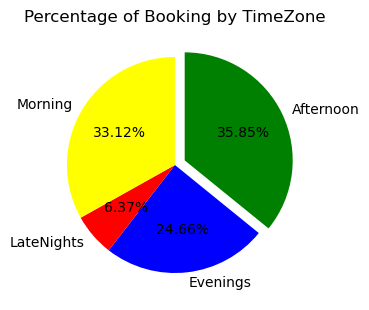

In [23]:
df1 = pd.DataFrame(df.groupby(['timeZone'])['booking id'].count().reset_index())
df1['percentage'] = (df1['booking id'] / df1['booking id'].sum()) * 100

plt.figure(figsize=(5,3))
myexplode = [0.1,0.0,0.0,0.0]
mycolors = ['g','b','r','yellow']
plt.pie(df1['percentage'],labels=df1['timeZone'],autopct='%.2f%%',explode=myexplode,shadow=False,colors=mycolors,counterclock=False,startangle=90)
plt.tight_layout()
#plt.legend()
plt.title('Percentage of Booking by TimeZone')
plt.show()

#### Based on above analysis

1. **Peak Demand Times**
   - **Afternoon (35.85%)** has the highest share of bookings.
   - **Morning (33.12%)** is also very high.
   - Together, **Afternoon + Morning ≈ 69%** of bookings → most rides happen during working hours.

2. **Moderate Demand**
   - **Evenings (24.66%)** represent 1 in 4 rides.
   - Likely driven by **office commute & leisure activities**.

3. **Low Demand**
   - **Late Nights (6.37%)** have the least demand.
   - Expected since travel at these hours is minimal.

4. **Business Recommendation**
   - Allocate more drivers during **Morning & Afternoon** (peak slots).
   - Provide **promotions/incentives** in **Evenings & Late Nights** to boost rides.

# What are the Most opted Uber vehicles?

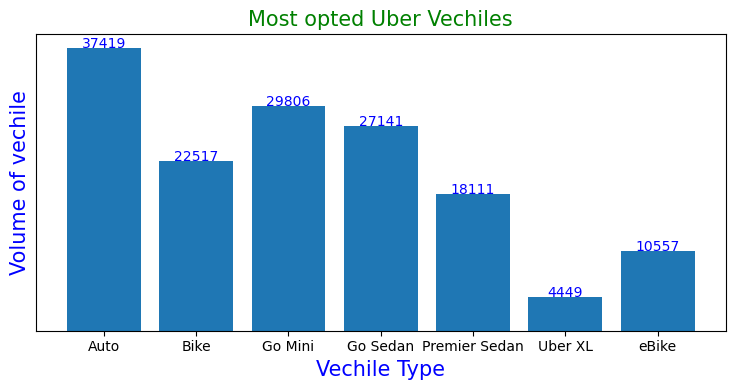

In [24]:
df2 = df.groupby('vehicle type')['booking id'].count().reset_index()
df2.columns = ['vehicle type', 'count']
plt.figure(figsize=(8,4))
plt.bar(df2['vehicle type'],df2['count'])#,color = ['r','b','k','g','orange'],width=[0.8,0.6,0.7,0.4,0.5],bottom=[0],align='center') 
plt.xlabel('Vechile Type',color='b',fontsize=15) 
plt.ylabel('Volume of vechile',color='b',fontsize=15) 
plt.title('Most opted Uber Vechiles',color='g',fontsize=15) 
plt.tight_layout()
for i in range(len(df2['vehicle type'])):
    plt.text(df2['vehicle type'][i],df2['count'][i]+10,df2['count'][i],ha='center',color='blue')
plt.yticks([])
plt.show() 

1. High Demand Vehicles
    - Auto (28.6%) has the highest bookings → indicates strong preference for affordable short-distance rides.
    - Go Mini (22.8%) and Go Sedan (20.7%) together account for ~43% of total rides → cars remain highly popular.
2. Moderate Usage
    - Bike (17.2%) shows growing adoption → useful for quick, solo trips and avoiding traffic.
    - Premier Sedan (13.9%) has a niche demand → likely preferred by business-class or premium users.
3. Low Demand Vehicles
    - eBike (8.1%) is still emerging → adoption may rise with eco-friendly campaigns.
    - Uber XL (3.4%) has the least demand → large vehicles are rarely needed, except for group travel.
4. Business Implications
    - Focus driver supply on Autos, Go Mini, and Go Sedan to meet the majority (~72%) of demand.
    - Promote Bike & eBike rides in high-traffic areas for faster, low-cost commuting.
    - Consider targeted discounts/offers for Premier Sedan & Uber XL to increase adoption.

# What are the Top  5 Pickup locations?

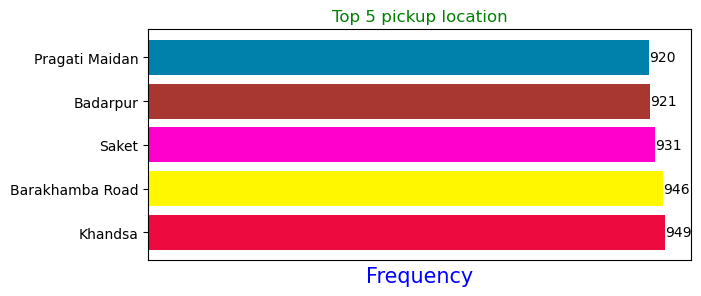

In [25]:
location_count = pd.DataFrame(df['pickup location'].value_counts().reset_index())
# Rename columns
location_count.columns = ['pickup location', 'count']
df3 = location_count.head()

plt.figure(figsize=(7,3))
c = ['#ED0A3F','#FFF700', '#FF00CC','#A83731','#0081AB'] 
plt.barh(df3['pickup location'],df3['count'],color=c)
plt.title('Top 5 pickup location',color='g')
#plt.ylabel('State',color='b',fontsize=15)
plt.xlabel('Frequency',color='b',fontsize=15)
for index, value in enumerate(df3['count']):
    plt.text(value, index, str(value), va='center') 
plt.xticks([])
plt.show()

# What are the bottom  5 Pickup locations?

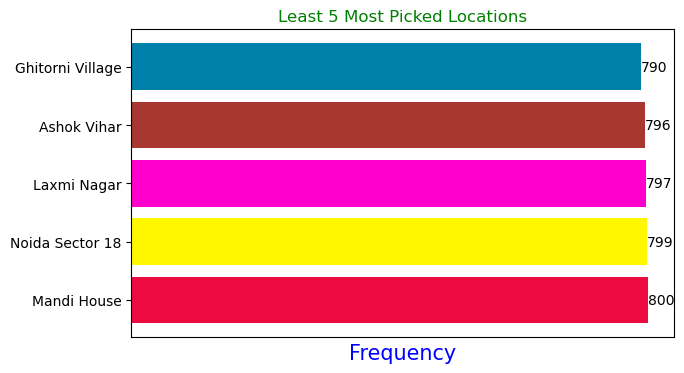

In [26]:
df4 = location_count.tail(5)
plt.figure(figsize=(7,4))
c = ['#ED0A3F','#FFF700', '#FF00CC','#A83731','#0081AB'] 
plt.barh(df4['pickup location'],df4['count'],color=c)
plt.title('Least 5 Most Picked Locations',color='g')
#plt.ylabel('State',color='b',fontsize=15)
plt.xlabel('Frequency',color='b',fontsize=15)
for index, value in enumerate(df4['count']):
    plt.text(value, index, str(value), va='center') 
plt.xticks([])
plt.show()

## Total Bookings

In [28]:
df['booking id'].nunique()

148767

## Success Rate

In [29]:
(df[df['booking status'] == 'Completed'].shape[0]/df['booking id'].nunique())*100

62.513863961765715

### Cancellation Rate:

In [30]:
(df[df['booking status'].isin(['Cancelled by Driver','Cancelled by Customer','No Driver Found','Incomplete'])].shape[0])/ (df['booking id'].nunique())*100

38.314948879791885

### Customer Cancellations

In [31]:
(df[df['booking status'] == 'Cancelled by Customer'].shape[0] / df['booking id'].nunique())*100

7.058016898909032

### Driver Cancellations:

In [32]:
(df[df['booking status'] == 'Cancelled by Driver'].shape[0] / df['booking id'].nunique())*100

18.14918631148037

### Customer Cancellations:

In [92]:
(df[df['booking status'] == 'Cancelled by Customer'].shape[0] / df['booking id'].nunique())*100

7.058016898909032

### Average Distance Traveled by Vehicle

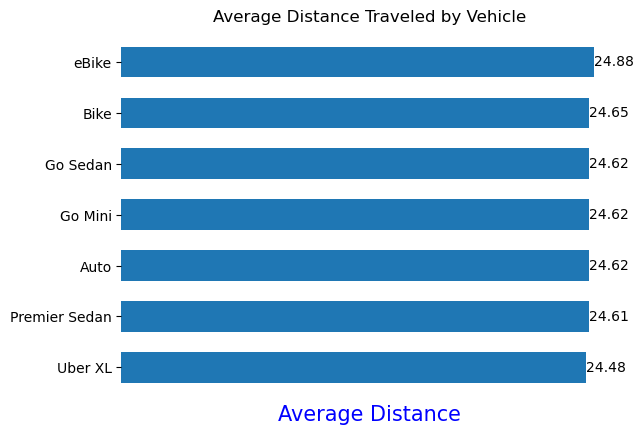

In [86]:
df_1 = (df.groupby(['vehicle type'])['ride distance'].mean()).round(2).reset_index().sort_values(by='ride distance',ascending=True)
df_1.columns=['vehicle type','ride distance(KM)']
plt.barh(df_1['vehicle type'],df_1['ride distance(KM)'],height=0.6)
plt.title('Average Distance Traveled by Vehicle')
plt.xlabel('Average Distance',color='b',fontsize=15,)
for index, value in enumerate(df_1['ride distance(KM)']):
    plt.text(value, index, str(value), va='center') 
# Remove all spines (borders)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xticks([])
plt.show()
plt.show()

### Total Distance Traveled by Vehicle

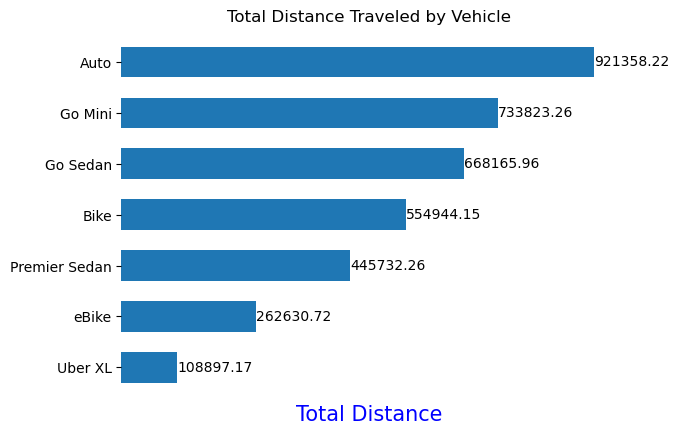

In [93]:
df_2 = (df.groupby(['vehicle type'])['ride distance'].sum()).round(2).reset_index().sort_values(by='ride distance',ascending=True)
df_2.columns=['vehicle type','ride distance(KM)']
plt.barh(df_2['vehicle type'],df_2['ride distance(KM)'],height=0.6)
plt.title('Total Distance Traveled by Vehicle')
plt.xlabel('Total Distance',color='b',fontsize=15,)
for index, value in enumerate(df_2['ride distance(KM)']):
    plt.text(value, index, str(value), va='center') 
# Remove all spines (borders)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xticks([])
plt.show()
plt.show()

### Success Rate by Vehicle

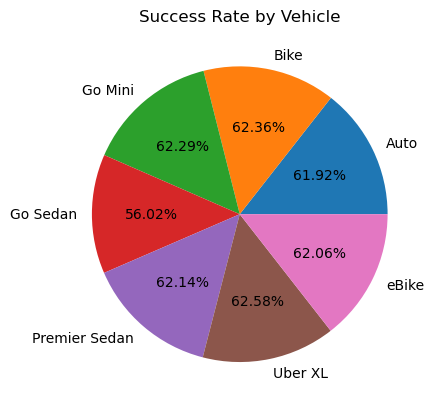

In [203]:
# Completed Auto bookings (unique IDs)
completed_bike = df[(df['booking status'] == 'Completed') & (df['vehicle type']=='Auto')]['booking id'].nunique()
total_bike = df[df['vehicle type']=='Auto']['booking id'].nunique()
percentage_a = round((completed_bike / total_bike)*100,2)

# Completed Bike bookings (unique IDs)
completed_bike = df[(df['booking status'] == 'Completed') & (df['vehicle type']=='Bike')]['booking id'].nunique()
total_bike = df[df['vehicle type']=='Bike']['booking id'].nunique()
percentage_b = round((completed_bike / total_bike) * 100,2)

# Completed Go Mini bookings (unique IDs)
completed_bike = df[(df['booking status'] == 'Completed') & (df['vehicle type']=='Go Mini')]['booking id'].nunique()
total_bike = df[df['vehicle type']=='Go Mini']['booking id'].nunique()
percentage_g = round((completed_bike / total_bike) * 100,2)

# Completed Go Sedan bookings (unique IDs)
completed_bike = df[(df['booking status'] == 'Completed') & (df['vehicle type']=='Go Sedan')]['booking id'].nunique()
total_bike = df[df['vehicle type']=='Go Mini']['booking id'].nunique()
percentage_s = round((completed_bike / total_bike) * 100,2)

# Completed Premier Sedan bookings (unique IDs)
completed_bike = df[(df['booking status'] == 'Completed') & (df['vehicle type']=='Premier Sedan')]['booking id'].nunique()
total_bike = df[df['vehicle type']=='Premier Sedan']['booking id'].nunique()
percentage_p = round((completed_bike / total_bike) * 100,2)

# Completed Uber XL bookings (unique IDs)
completed_bike = df[(df['booking status'] == 'Completed') & (df['vehicle type']=='Uber XL')]['booking id'].nunique()
total_bike = df[df['vehicle type']=='Uber XL']['booking id'].nunique()
percentage_u = round((completed_bike / total_bike) * 100,2)

# Completed eBike bookings (unique IDs)
completed_bike = df[(df['booking status'] == 'Completed') & (df['vehicle type']=='eBike')]['booking id'].nunique()
total_bike = df[df['vehicle type']=='eBike']['booking id'].nunique()
percentage_e = round((completed_bike / total_bike) * 100,2)

import pandas as pd

df_s = pd.DataFrame({
    'vehicle type': ['Auto', 'Bike', 'Go Mini', 'Go Sedan', 'Premier Sedan', 'Uber XL', 'eBike'],
    'percentage': [61.92, 62.36, 62.29, 56.02, 62.14, 62.58, 62.06]
})

plt.pie(df_s['percentage'], labels=df_s['vehicle type'],autopct=lambda p: f'{p*sum(df_s["percentage"])/100:.2f}%')
plt.title('Success Rate by Vehicle')
plt.show()

### Total Payment Methods

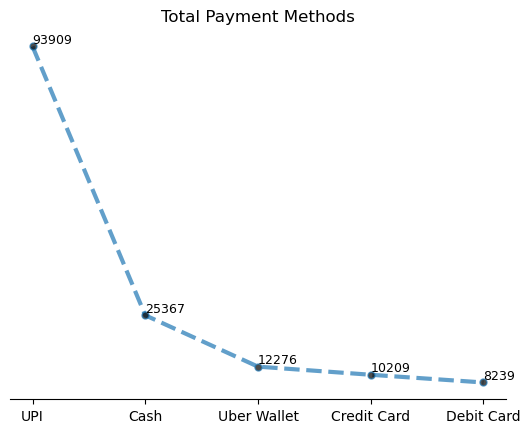

In [202]:
df_u = df['payment method'].value_counts().reset_index()

plt.plot(df_u['payment method'], df_u['count'],marker='o', linestyle='--', alpha=0.7, lw=3,ms=5, mfc='black')
plt.title('Total Payment Methods')

for x, y in zip(df_u['payment method'], df_u['count']):
    plt.text(x, y+0.5, str(y), va='bottom', fontsize=9, color='black')

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)
ax.spines['bottom'].set_visible(True)

plt.yticks([])
plt.show()

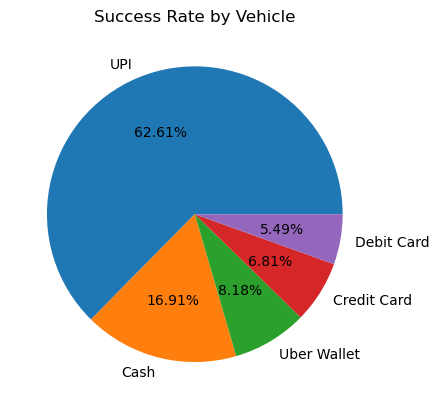

In [222]:
df_u = df['payment method'].value_counts(normalize=True).reset_index()
df_u['proportion'] = round(df_u['proportion']*100,2)

plt.pie(df_u['proportion'], labels=df_u['payment method'],autopct='%.2f%%')
plt.title('Success Rate by Vehicle')
plt.show()

# Cancellation Patterns

### Reason for cancelling by Customer

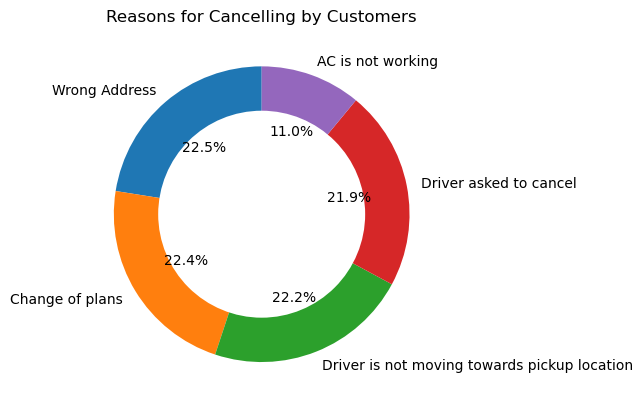

In [257]:
cancel_reasons = [
    'Wrong Address',
    'Change of plans',
    'Driver is not moving towards pickup location',
    'Driver asked to cancel',
    'AC is not working'
]
df_filtered = df[df['reason for cancelling by customer'].isin(cancel_reasons)]


df_c = (df_filtered['reason for cancelling by customer'].value_counts(normalize=True)*100).reset_index()

plt.pie(df_c['proportion'], labels=df_c['reason for cancelling by customer'], autopct='%.1f%%', startangle=90)
# Add white circle in the middle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Reasons for Cancelling by Customers")
plt.show()

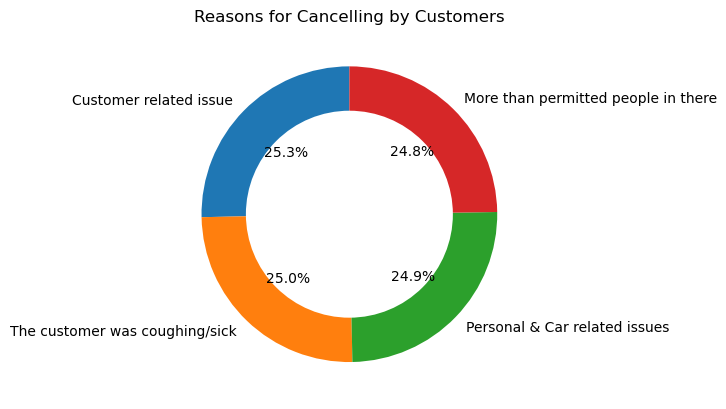

In [264]:
cancel_reasons = [
            'Customer related issue','The customer was coughing/sick','Personal & Car related issues','More than permitted people in there'
]
df_filtered = df[df['driver cancellation reason'].isin(cancel_reasons)]


df_c = (df_filtered['driver cancellation reason'].value_counts(normalize=True)*100).reset_index()

plt.pie(df_c['proportion'], labels=df_c['driver cancellation reason'], autopct='%.1f%%', startangle=90)
# Add white circle in the middle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Reasons for Cancelling by Customers")
plt.show()

In [261]:
df['driver cancellation reason'].value_counts()

driver cancellation reason
Reason Unkown                          123000
Customer related issue                   6837
The customer was coughing/sick           6751
Personal & Car related issues            6726
More than permitted people in there      6686
Name: count, dtype: int64

# Rating Analysis

### Customer Ratings

In [270]:
df_c = df.groupby(['vehicle type'])['customer rating'].mean().reset_index()
df_c

,vehicle type,customer rating
0,Auto,4.402985
1,Bike,4.404183
2,Go Mini,4.404405
3,Go Sedan,4.407909
4,Premier Sedan,4.403884
5,Uber XL,4.404751
6,eBike,4.404193


#### Consistently high across all vehicle types

In [271]:
df_d = df.groupby(['vehicle type'])['driver ratings'].mean().reset_index()
df_d

,vehicle type,driver ratings
0,Auto,4.231844
1,Bike,4.230409
2,Go Mini,4.228940
3,Go Sedan,4.231496
4,Premier Sedan,4.233398
5,Uber XL,4.235589
6,eBike,4.227655


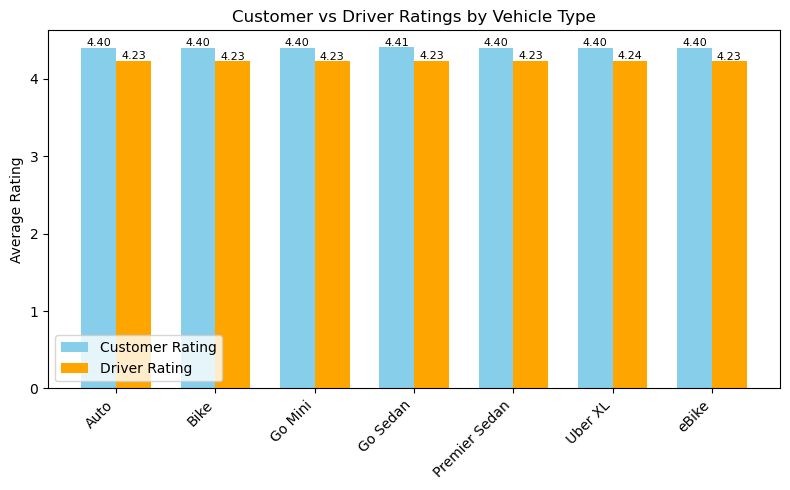

In [276]:
# Merge both DataFrames on vehicle type
df_cd = df_c.merge(df_d, on='vehicle type')

# X-axis positions
x = np.arange(len(df_cd['vehicle type']))
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(8,5))

# Bars
ax.bar(x - width/2, df_cd['customer rating'], width, label='Customer Rating', color='skyblue')
ax.bar(x + width/2, df_cd['driver ratings'], width, label='Driver Rating', color='orange')

# Labels & formatting
ax.set_xticks(x)
ax.set_xticklabels(df_cd['vehicle type'], rotation=45, ha='right')
ax.set_ylabel("Average Rating")
ax.set_title("Customer vs Driver Ratings by Vehicle Type")
ax.legend()

# Add labels above bars
for i, v in enumerate(df_cd['customer rating']):
    ax.text(i - width/2, v + 0.02, f"{v:.2f}", ha='center', fontsize=8)
for i, v in enumerate(df_cd['driver ratings']):
    ax.text(i + width/2, v + 0.02, f"{v:.2f}", ha='center', fontsize=8)

plt.tight_layout()
plt.show()

1. **Customer Ratings:** Consistently high across all vehicle types (4.40-4.41)
2. **Driver Ratings:** Slightly lower but stable (4.23-4.24)
3. **Highest Rated:** Go Sedan (4.41 customer rating)
4. **Most Satisfied Drivers:** UberXL category (4.24 rating)